In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [1]:
from utils import read_files
from utils import pca_transofrmation
df_final = read_files('/home/david/Documents/HAR/data/harth')
X_pca, y = pca_transofrmation(df_final)
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
0,15.259753,28.476209,11.749857,34.158977,6.122358,56.576114,99.774931,19.381623,49.441228,8.683265,...,0.452624,0.127944,0.640533,0.054196,-0.888525,0.683743,1.557420,-9.460261,-22.296670,-5.175438
1,1.411590,4.168288,1.474030,0.416199,0.370706,2.423054,2.044256,0.782181,4.317048,-0.244394,...,0.053458,0.016485,0.031607,0.007872,-0.046957,0.063939,0.139864,-1.293864,-0.683405,-0.980892
2,0.538675,3.643919,1.465003,-0.130947,0.477834,0.794071,-0.840138,0.434273,3.604709,-0.282197,...,0.037545,0.011417,0.040912,0.006628,-0.047165,0.044313,0.084527,-0.822767,-0.779816,-0.583557
3,0.219051,3.374772,1.107466,-0.794776,0.015893,0.177590,-1.703613,0.251749,2.953230,-0.294314,...,0.035469,0.018384,0.031471,0.000045,-0.028405,0.030077,0.033724,-0.657387,-0.473037,-0.517400
4,0.184976,3.467239,0.892473,-1.018615,-0.283529,0.262277,-1.271925,0.219683,3.036408,-0.413809,...,-0.001921,-0.009348,0.050092,-0.012060,-0.017835,0.030639,0.009662,-0.615029,-0.534486,-0.394945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128758,-1.786875,-0.046389,-0.490176,2.835369,1.750635,2.690541,1.625597,2.808822,-1.327897,-1.143553,...,0.002506,-0.001039,0.003620,-0.052715,0.048657,-0.046210,0.153852,-0.728909,-0.692244,-0.173572
128759,-1.826036,-0.331235,0.146498,1.238234,2.429462,2.429047,2.553466,1.483351,0.342499,-0.687866,...,-0.014049,-0.016090,0.022668,-0.019678,-0.054265,0.049015,-0.000242,-0.214954,-0.485316,0.019337
128760,2.710204,2.594374,0.092545,1.362833,-0.745445,4.198422,2.356496,-0.598535,-0.572298,-0.050271,...,0.037357,-0.003557,0.059446,-0.039237,-0.187419,0.116586,0.124742,-0.831325,-0.533181,0.468700
128761,1.519461,2.732033,-0.012375,1.685147,-0.137596,2.982261,0.060729,-0.768495,1.546099,-0.221670,...,0.039102,0.010848,0.056428,-0.034033,-0.076507,0.020341,0.111116,-0.522893,-1.094548,0.054073


In [34]:
y_df = pd.Series(y)

counts = y_df.value_counts()
counts

7      57978
1      23964
6      14881
8       8208
13      7879
2       5827
3       5044
4       1529
5       1345
14      1120
130      832
140      156
Name: count, dtype: int64

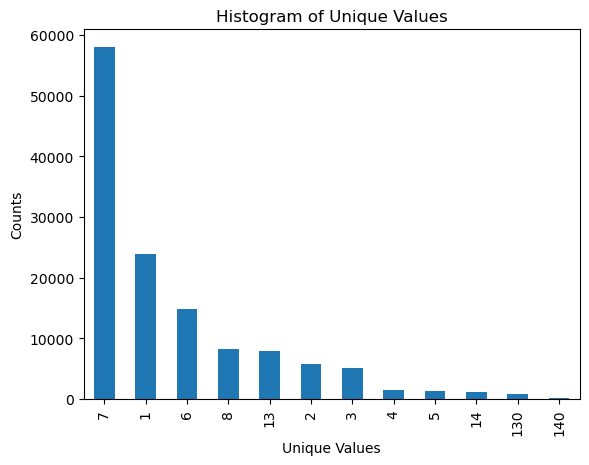

In [36]:
counts.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Histogram of Unique Values')
plt.show()

## Neural Networks

In [4]:
from sklearn.neural_network import MLPClassifier
# Create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=1000)

from sklearn.model_selection import cross_val_score
# Perform cross-validation
mlp_scores = cross_val_score(mlp, X_pca, y, cv=3, scoring='f1_weighted')  # Use 3-fold cross-validation
mlp_scores.mean()

0.8780706577261078

## Random Forest

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf_param_dist = {
    'n_estimators': [20, 40, 80, 100, 120],
    'max_depth': [None],
    'criterion': ['gini'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'max_leaf_nodes': [None],
    'bootstrap': [True],
    'n_jobs': [10],
    'class_weight': [None, 'balanced']
}

gs_rf = GridSearchCV(estimator=rf, param_grid=rf_param_dist, cv=3, scoring='f1_weighted')
# Fit the grid search on your data
gs_rf.fit(X_pca, y)

# Best hyperparameters
rf_best_params = gs_rf.best_params_

# Best score
rf_best_score = gs_rf.best_score_


In [ ]:
print("Best F1-score (weighted):", rf_best_score)

In [13]:
# Create a RandomForestClassifier with best hyperparameters
best_rf = RandomForestClassifier(**rf_best_params)

# Fit the best model on the full dataset
best_rf.fit(X_pca, y)

RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                       n_estimators=80, n_jobs=10)

In [14]:
from sklearn.model_selection import cross_val_score
rf_scores = cross_val_score(best_rf, X_pca, y, cv=3, scoring='f1_weighted')  # Perform 3-fold cross-validation
rf_mean_score = rf_scores.mean()
rf_mean_score

0.8884223436698196

## Support Vector Machine

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svmC = SVC()

svmC_param_dist = {
    'kernel': ['rbf'],
    'class_weight': [None, 'balanced'],
    'probability': [True],
    'C': [1, 10, 100],
    'gamma': ['scale',0.0001],
    'max_iter': [-1]
}

gs_svmC = GridSearchCV(estimator=svmC, param_grid=svmC_param_dist, cv=3, scoring='f1_weighted')
# Fit the grid search on your data
gs_svmC.fit(X_pca, y)

# Best hyperparameters
svmC_best_params = gs_svmC.best_params_

# Best score
svmC_best_score = gs_svmC.best_score_

In [4]:
print("Best F1-score (weighted):", svmC_best_score)

Best F1-score (weighted): 0.8550185681314747


In [6]:
svmC_best_params

{'C': 100,
 'class_weight': None,
 'gamma': 0.0001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True}

In [7]:
# Create a Support Vector Machine with best hyperparameters
best_svmC = SVC(**svmC_best_params)

# Fit the best model on the full dataset
best_svmC.fit(X_pca, y)

NameError: name 'X_pca' is not defined

## K-Neighbors Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_param_dist = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,20,30],
    'weights': ["uniform", "distance"],
    'n_jobs': [1]
}

gs_knn = GridSearchCV(estimator=knn, param_grid=knn_param_dist, cv=3, scoring='f1_weighted')
# Fit the grid search on your data
gs_knn.fit(X_pca, y)

# Best hyperparameters
knn_best_params = gs_knn.best_params_

# Best score
knn_best_score = gs_knn.best_score_

In [ ]:
print("Best F1-score (weighted):", knn_best_score)

In [ ]:
# Create a K-Neighbors Classifier with best hyperparameters
best_knn = KNeighborsClassifier(**knn_best_params)

# Fit the best model on the full dataset
best_knn.fit(X_pca, y)

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(best_knn, X_pca, y, cv=3, scoring='f1_weighted')  # Perform 3-fold cross-validation
knn_mean_score = knn_scores.mean()
knn_mean_score